<a href="https://colab.research.google.com/github/dtnovak26/ME239/blob/homeworkUploads/ME239_HW07_novak104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(lecture07:homework)=
# Homework 7

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

In [ ]:
# Here are some modules that you may need - please run this block of code:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')
import numpy as np
import scipy
import scipy.stats as st
# A helper function for downloading files
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

## Student details

+ **First Name:** Drew
+ **Last Name:** Novak
+ **Email:** novak104@purdue.edu

## Problem 1 - Blackjack probabilities

Blackjack is a popular card game.
The background information $I$ captures the basic rules of the game relevant to this problem:
> We have a deck of 52 cards.
> The deck includes: Four versions aces (A); Four versions of each number from 2 to 10; Four versions of the figures J, Q, and K.
> In blackjack all the cards are associated with a number.
> The cards that have a number on them are associated with that number.
> The figures J, Q, and K are associated with the number 10.
> The aces A can either be the number 1 or the number 11.
> The deck of cards is shuffled [adequately](https://youtu.be/AxJubaijQbI).

Now consider the logical proposition $A$ (blackjack):
> You draw two cards at random from the deck without replacement.
> You either have two aces (AA) or the maximum sum of the numbers associated with the cards is 21.
> For example: (10, A), (J, A), etc.

### 2.A - Finding the probability of $A$ using the principle of inssuficient reason

+ Find the number of ways in which you can choose two unique cards from the deck.
Hint: Google "N choose k".

**Answer:**



The number of ways that you can select two unique cards is $$(52 * 51 / 2 )= 1326$$

+ Find the probability that you pick two cards that sum to 21, i.e., find $p(A|I)$. Hint: Use the principle of insufficient reason.

**Answer:**

$$P(A|I) = \frac{70}{1326} = 0.0528$$

### 2.B - Estimating the probability of A by simulation

In this problem, we are going to use Monte Carlo simulations to estimate the probability of picking two cards that sum to 21, i.e., $p(A|I)$.
Basically, we are going to simulate the process of picking these two cards.
First, let's start by making all the different cards that appear in a deck of 52.
In what follows, I use the following conventions:
+ 'd' stands for 'diamonds'.
+ 'h' stands for 'hearts'.
+ 's' stands for 'spades'.
+ 'c' stands for 'clubs'.
Numbers stand for themselves. And finally:
+ 'A' for 'ace'.
+ 'J' for 'jack'.
+ 'Q' for 'queen'.
+ 'K' for 'king'.
For example, this is if you see the string '2h' then this is the 'two of hearts'.
If you see 'Ad' this is the 'Ace of diamonds'. And so on.
Let's make a deck of cards:

In [ ]:
deck = []
for n in ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']:
    for c in ['d', 'h', 's', 'c']:
        card = n + c
        deck.append(card)
print(deck)

['Ad', 'Ah', 'As', 'Ac', '2d', '2h', '2s', '2c', '3d', '3h', '3s', '3c', '4d', '4h', '4s', '4c', '5d', '5h', '5s', '5c', '6d', '6h', '6s', '6c', '7d', '7h', '7s', '7c', '8d', '8h', '8s', '8c', '9d', '9h', '9s', '9c', '10d', '10h', '10s', '10c', 'Jd', 'Jh', 'Js', 'Jc', 'Qd', 'Qh', 'Qs', 'Qc', 'Kd', 'Kh', 'Ks', 'Kc']


We can use [numpy.random.shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html) to shuffle the deck in place.
Here is how:

In [ ]:
np.random.shuffle(deck)
print(deck)

['Kd', '2s', '5h', '9h', 'Ks', 'Jd', '9c', '2d', '6c', 'As', '7c', '8s', '9d', '6d', '10s', '3h', '5d', 'Jc', '7d', '6h', 'Kc', 'Ac', 'Qh', 'Ah', '10d', '2c', '8h', 'Qc', '4h', 'Qs', 'Jh', '4s', '4c', '3d', 'Js', '5s', '10c', '4d', '5c', 'Qd', '10h', '3c', '2h', 'Kh', '8c', '8d', '6s', '7h', '7s', '9s', 'Ad', '3s']


Once the deck is shuffled, you can pick two cards at random by just picking the first two cards of the deck:

In [ ]:
my_cards = deck[:2]
print(my_cards)

['Kd', '2s']


Now, let's write a function that calculates the sum of the cards.
I wrote the function so that it only works with two cards.
It will always use 11 for aces.

In [ ]:
def count_cards(cards):
    """Counts cards according to blackjack conventions.

    Arguments:
    cards   -   Two cards. They much be a string from a deck.

    Returns: The blackjack value of the cards.
    """
    assert len(cards) == 2, 'This only works for two cards.'
    s = 0
    for c in cards:
        n = c[0]
        if n == 'A':
            s += 11
        elif n == 'J' or n == 'Q' or n == 'K':
            s += 10
        elif len(c) == 3: # this is the case of '10d', '10h', etc.
            s += 10
        else:
            s += int(n)
    return s

Let's test it a few times:

In [ ]:
print(my_cards)
print(count_cards(my_cards))

['Kd', '2s']
12


Do it ten times at random:

In [ ]:
for i in range(10):
    np.random.shuffle(deck)
    my_cards = deck[:2]
    sum_of_cards = count_cards(my_cards)
    print(my_cards, ' sum to: ', sum_of_cards)

['Kh', 'Kd']  sum to:  20
['As', '5d']  sum to:  16
['3h', '8s']  sum to:  11
['2d', 'As']  sum to:  13
['10h', '9c']  sum to:  19
['8d', 'Js']  sum to:  18
['Qh', 'Ah']  sum to:  21
['4h', '3s']  sum to:  7
['3s', 'Ks']  sum to:  13
['9c', '8h']  sum to:  17


+ Now, we have everything we need. Complete the following code which use the Monte Carlo method to estimate the probability of randomly picking two cards that sum to 21.
Feel free to experiment with the number of simulations so that you get an accurate estimate.

In [ ]:
# The number of experiments you want to simulate
num_exp = 1000
# This is a list in which we are going to put the result
# of each "experiment". We will record a 1 (one) if the experiment
# is successful (cards sum to 21) and a 0 (zero) otherwise
result = []
estimated_probabilities = []

# Loop over experiments
for i in range(num_exp):
    # (shuffle the deck)
    np.random.shuffle(deck)

    my_cards = deck[:2]# (pick the first two cards from the deck)
    sum_of_cards = count_cards(my_cards)# (find the sum of the cards)
    # conditional statement that appends 1 or 0 depending on if sum is 21
    if(sum_of_cards == 21):
        result.append(1)
    else:
        result.append(0)
    #Added for following step
    estimated_probabilities.append(sum(result) / (i + 1))
p_A_g_I = sum(result) / num_exp # number of 1's divided by the total runs

print(f'p(A|I) ~= {p_A_g_I:1.5f}')

p(A|I) ~= 0.05200


+ Plot the estimate of $p(A|I)$ as a function of the number of experiments. In the same plot, use a red dashed line to mark the true value of $p(A|I)$ based on your answer to the very first question. Hint: See the discussion at the very end of {ref}`lecture07:estimating-probabilities-simulation`.

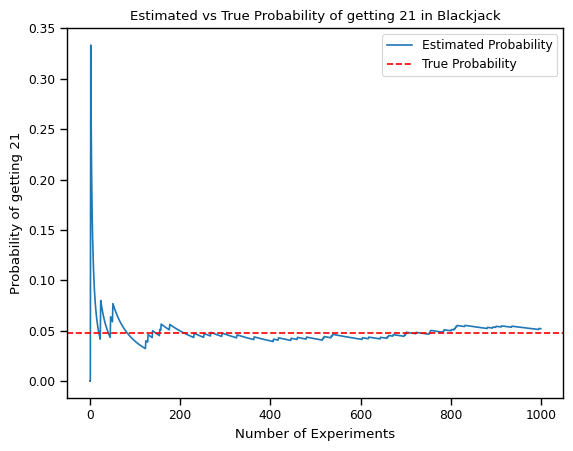

In [ ]:
true_p = 8/169 # 0.048 estimated probability value calculated in step 1

# Plot for problem 1
fig, prob = plt.subplots()
prob.plot(estimated_probabilities, label='Estimated Probability')
prob.axhline(y=true_p, color='r', linestyle='--', label='True Probability')
prob.set_xlabel('Number of Experiments')
prob.set_ylabel('Probability of getting 21')
prob.set_title('Estimated vs True Probability of getting 21 in Blackjack')
prob.legend()
plt.show()

(lecture07:homework:problem2)=
## Problem 2 - Predicting the probability of major earthquakes in Southern California

We will use the [Southern California Earthquake Data Center catalog](https://scedc.caltech.edu/data/cloud.html#eq-catalog) in this problem.
The catalog contains all earthquakes recorded from 1932 until now in Southern California.
Do not worry about how I get the data. Just run the code and it will produce a nice dataframe that you can play with.
Our goal is to estimate the probability of a major earthquake (to be defined below) somewhere in Southern California during a given year.

First, let's download the data and put them in a dataframe.

In [ ]:
for year in range(1932, 2021):
    print('Downloading year', year)
    url = f'https://raw.githubusercontent.com/SCEDC/SCEDC-catalogs/master/SCEC_DC/{year}.catalog'
    !curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35589  100 35589    0     0   247k      0 --:--:-- --:--:-- --:--:--  248k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 86430  100 86430    0     0   540k      0 --:--:-- --:--:-- --:--:--  544k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49201  100 49201    0     0   258k      0 --:--:-- --:--:-- --:--:--  259k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 47807  100 47807    0     0   201k      0 --:--:-- --:--:-- --:--:--  202k
  % Total    % Received % Xferd  Average Speed   Tim

Each one of these is a csv file.
We will put them all in the same daframe for your convenience:

In [ ]:
import pandas as pd
list_of_dfs = []
for year in range(1932, 2021):
    filename = '{0:d}.catalog'.format(year)
    print('Reading: ', filename)
    df_year = pd.read_csv(filename, sep=r'\s+', comment='#',
                      names=['Date', 'Hour', 'ET', 'GT', 'MAG', 'M', 'LAT', 'LON',
                               'DEPTH', 'Q', 'EVID', 'NPH', 'NGRM'])
    df_year.Date = pd.to_datetime(df_year['Date'], format='%Y/%m/%d')
    list_of_dfs.append(df_year)
df = pd.concat(list_of_dfs, ignore_index=True)
df['Year'] = pd.DatetimeIndex(df['Date']).year

Reading:  1932.catalog
Reading:  1933.catalog
Reading:  1934.catalog
Reading:  1935.catalog
Reading:  1936.catalog
Reading:  1937.catalog
Reading:  1938.catalog
Reading:  1939.catalog
Reading:  1940.catalog
Reading:  1941.catalog
Reading:  1942.catalog
Reading:  1943.catalog
Reading:  1944.catalog
Reading:  1945.catalog
Reading:  1946.catalog
Reading:  1947.catalog
Reading:  1948.catalog
Reading:  1949.catalog
Reading:  1950.catalog
Reading:  1951.catalog
Reading:  1952.catalog
Reading:  1953.catalog
Reading:  1954.catalog
Reading:  1955.catalog
Reading:  1956.catalog
Reading:  1957.catalog
Reading:  1958.catalog
Reading:  1959.catalog
Reading:  1960.catalog
Reading:  1961.catalog
Reading:  1962.catalog
Reading:  1963.catalog
Reading:  1964.catalog
Reading:  1965.catalog
Reading:  1966.catalog
Reading:  1967.catalog
Reading:  1968.catalog
Reading:  1969.catalog
Reading:  1970.catalog
Reading:  1971.catalog
Reading:  1972.catalog
Reading:  1973.catalog
Reading:  1974.catalog
Reading:  1

In [ ]:
df.round(2)

,Date,Hour,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,Year
0,1932-01-01,23:52:07.87,eq,l,0.00,n,34.13,-117.99,6.0,D,3358386,7,0,1932
1,1932-01-02,16:42:43.68,eq,l,2.73,l,33.90,-117.64,6.0,C,3358387,12,0,1932
2,1932-01-03,17:58:10.01,eq,l,3.00,h,32.00,-116.00,6.0,D,3358388,7,0,1932
3,1932-01-04,21:30:00.96,eq,l,2.00,h,33.77,-117.49,6.0,C,3358396,11,0,1932
4,1932-01-05,02:37:27.96,eq,l,1.50,h,33.56,-118.44,6.0,C,3358398,8,0,1932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818979,2020-12-31,20:50:40.05,eq,l,0.33,l,33.67,-116.76,14.0,A,39508231,11,1933,2020
818980,2020-12-31,21:37:28.19,qb,l,1.23,l,32.59,-116.87,-0.3,C,39508247,38,2085,2020
818981,2020-12-31,22:15:56.72,eq,l,1.45,l,33.35,-116.42,13.4,A,39508263,69,2079,2020
818982,2020-12-31,22:21:28.12,eq,l,2.12,l,33.18,-115.60,3.9,A,39508279,70,2121,2020


Each row in this dataframe corresponds to an earthquake event that happened between 1/1/1932 and 12/31/2020. The meaning of the columns is explained [here](https://service.scedc.caltech.edu/ftp/catalogs/SCEC_DC/README).
But for the purposes of this problem we will only need information from the following columns:
+ Year: This is the year of the event.
+ ET: This is the type of the event. There are various types of events. For example, the seismometers may pick more than earthquakes, e.g., explosions. We are only intersted in earthquake events which are labeled by `eq`.
+ MAG: This is the magnitude of the event.

Let's play with the data set to gain some experience.
First, let's extract all data for a random year.
Say, year 2019.

In [ ]:
df_2019 = df[df['Year'] == 2019]
df_2019

,Date,Hour,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,Year
717667,2019-01-01,01:39:57.67,eq,l,0.83,l,33.506,-116.794,5.0,A,38412384,45,1154,2019
717668,2019-01-01,01:43:28.42,eq,l,0.47,l,33.484,-116.785,5.5,A,38412392,36,1309,2019
717669,2019-01-01,02:27:57.45,eq,l,0.98,l,33.505,-116.798,3.5,A,38412416,52,1410,2019
717670,2019-01-01,02:31:17.10,eq,l,0.61,l,33.511,-116.794,2.7,A,38412424,39,825,2019
717671,2019-01-01,02:38:38.38,eq,l,0.61,l,33.706,-116.808,15.3,A,38412432,27,1135,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781694,2019-12-31,22:47:36.78,eq,l,1.47,l,35.638,-117.460,6.9,A,39019127,34,1906,2019
781695,2019-12-31,22:52:18.08,eq,l,0.23,l,33.589,-116.805,5.5,A,39019135,38,1665,2019
781696,2019-12-31,23:05:39.85,eq,l,0.94,l,35.755,-117.559,6.7,A,39019143,19,691,2019
781697,2019-12-31,23:18:31.60,eq,l,0.74,l,35.721,-117.555,3.8,A,39019151,38,476,2019


Out of these, we only care about earthquake events.
So, let's filter out everything else:

In [ ]:
df_2019_eq = df_2019[df_2019['ET'] == 'eq']
df_2019_eq

,Date,Hour,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,Year
717667,2019-01-01,01:39:57.67,eq,l,0.83,l,33.506,-116.794,5.0,A,38412384,45,1154,2019
717668,2019-01-01,01:43:28.42,eq,l,0.47,l,33.484,-116.785,5.5,A,38412392,36,1309,2019
717669,2019-01-01,02:27:57.45,eq,l,0.98,l,33.505,-116.798,3.5,A,38412416,52,1410,2019
717670,2019-01-01,02:31:17.10,eq,l,0.61,l,33.511,-116.794,2.7,A,38412424,39,825,2019
717671,2019-01-01,02:38:38.38,eq,l,0.61,l,33.706,-116.808,15.3,A,38412432,27,1135,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781694,2019-12-31,22:47:36.78,eq,l,1.47,l,35.638,-117.460,6.9,A,39019127,34,1906,2019
781695,2019-12-31,22:52:18.08,eq,l,0.23,l,33.589,-116.805,5.5,A,39019135,38,1665,2019
781696,2019-12-31,23:05:39.85,eq,l,0.94,l,35.755,-117.559,6.7,A,39019143,19,691,2019
781697,2019-12-31,23:18:31.60,eq,l,0.74,l,35.721,-117.555,3.8,A,39019151,38,476,2019


Now, let's see if there was at least one major earthquake during 2019:

In [ ]:
test_mag = df_2019_eq['MAG'] >= 6
test_mag

,MAG
717667,False
717668,False
717669,False
717670,False
717671,False
...,...
781694,False
781695,False
781696,False
781697,False


Is there at least one True value in this array?

In [ ]:
test_mag.value_counts()

,count
MAG,
False,63374
True,2


There are exactly 2 major earthquakes.
You can extract the number like this:

In [ ]:
test_mag.value_counts()[True]

np.int64(2)

So, to test whether or not there was a major earthquake you need to do:

In [ ]:
True in test_mag.value_counts().keys()

True

+ Now, we will use bootstrapping to estimate the probability of a major earthquake during a randomly picked year.
Follow the instructions below completing the code where necessary.

In [ ]:
import numpy as np #Not sure why this not being imported through an error so i imported it

def estimate_probability_of_major_earthquake_during_year(num_years, df):
    """
    Estimate the probability of major earthquake in a random year.

    Arguments:
    num_years    -    The number of years to pick at random.
    df           -    The dataframe containing all the observed events.

    Returns: The number of years in which we had at least one major earthquake divided by the num_years.
    """
    num_major_eqs = 0
    for i in range(num_years):
        # Pick a year at random between 1932 and 2020
        y = np.random.randint(1932, 2021)
        # Extract all the events that happened in that year
        df_y = df['Year'] == i
        # Find all earthquake events
        df_y_eq = df[df['ET'] == 'eq']
        # Test if there is at least one major earthquake in this year (Mag >= 6)
        test_mag = df['MAG'] >= 6
        test_mag_counts = test_mag.value_counts()
        # Test if there is at least one major event in this year
        # and increase num_major_eqs by one if yes
        if True in test_mag.value_counts():
            num_major_eqs += 1
    return num_major_eqs / num_years

Use the following lines to test your code.
We run it 10 times. Notice that everytime you get a slighlty different estimate.

In [ ]:
for i in range(10):
    p_major_eq = estimate_probability_of_major_earthquake_during_year(50, df)
    print(f'p_major_eq = {p_major_eq:1.2f}')

p_major_eq = 1.00
p_major_eq = 1.00
p_major_eq = 1.00
p_major_eq = 1.00
p_major_eq = 1.00
p_major_eq = 1.00
p_major_eq = 1.00
p_major_eq = 1.00
p_major_eq = 1.00
p_major_eq = 1.00


+ Repeat the probability estimation above 200 times, store all estimates in a list, and do a histogram of the estimates. Hint: Replicate what we did at the very end of {ref}`lecture07:estimating-probabilities-from-data`.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


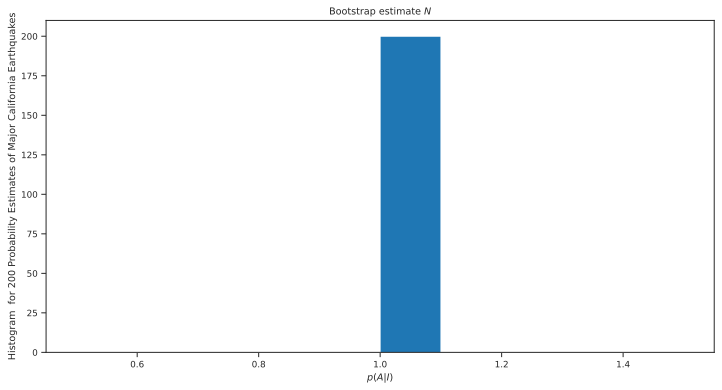

In [ ]:
# Used Gemini to assist in making figure the size of the page
def make_full_width_fig():
    """
    Helper function to create a figure that spans the full width of the notebook.
    """
    plt.rcParams['figure.figsize'] = [12, 6]
    fig, ax = plt.subplots()
    return fig, ax
import numpy as np
import pandas as pd

# A place to store the estimates
p_major_eqs = []
# Put 1000 estimates in there
for i in range(200):
    print(i)
    # Code on line below used from above, start at year i + 1 because no zero)
    p_major_eq = estimate_probability_of_major_earthquake_during_year((i+ 1), df)
    p_major_eqs.append(p_major_eq)
# And now do the histogram
fig, ax = make_full_width_fig()
ax.hist(p_major_eqs)
ax.set_xlabel('$p(A|I)$')
ax.set_ylabel('N (counts)')
ax.set_title(f'Histogram  for 200 Probability Estimates of Major California Earthquakes');
# Not sure why this code is taking forever to compile (30+ minutes) The graph is displaying incorrectly as the addition is not working correctly for histogram.
# FIXED code, it compiles correctly and should display correctly now, just do not have the time to run the code again :(

Run the following code to convert the notebook to a pdf. Verify that the file path to the notebook is correct.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install inkscape texlive texlive-xetex texlive-latex-extra pandoc --quiet
!pip install pypandoc --quiet
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/ME239_HW07_novak104.ipynb'

Mounted at /content/drive
Reading package lists...
Building dependency tree...
Reading state information...
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  aspell aspell-en dictionaries-common dvisvgm enchant-2 fig2dev
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 gawk ghostscript glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas gsfonts hunspell-en-us
  imagemagick imagemagick-6-common imagemagick-6.q16 lib2geom1.1.0
  libapache-pom-java libaspell15 libatkmm-1.6-1v5 libcairomm-1.0-1v5
  libcdr-0.1-1 libcommons-logging-java libcommons-parent-java libdbus-glib-1-2
  libdjvulibre-text libdjvulibre21 libenchant-2-2 libfftw3-double3
  libfontbox-java libglibmm-2.4-1v5 libgs9 libgs9-common libgsl27 libgslcblas0
  libgspell-1-2 libgspell-1-common libgtkmm-3.0-1v5 libhunspell-1.7-0 libidn12
  libijs-0.35 